In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('df_clean.csv')
df.head()

Job Title Salary Estimate  \
0       DOD Data Scientist/Engineer         94-155    
1           Research Data Scientist         72-120    
2         Clinical Lab Scientist/MT          20-33    
3       Scientist III, Pharma R & D          27-85    
4  Clinical Lab Scientist/MT or MLT          20-32    

                                     Job Description  Rating  \
0  Overview\n\nGuidehouse is a leading management...     3.6   
1  IAI is looking for a talented research scienti...     3.7   
2  Description\n\nPerforms various routine and co...     3.8   
3  The Scientist III develops and executes formul...     3.2   
4  Description\n\nPerforms various routine and co...     3.8   

                  Company Name            Location  Headquarters  \
0              Guidehouse\n3.6  Patuxent River, MD            -1   
1  Intelligent Automation\n3.7       Rockville, MD            -1   
2          OSF Healthcare\n3.8          Peoria, IL            -1   
3  Amneal Pharmaceuticals\n3.2      Piscataway, NJ            -1   
4          OSF Healthcare\n3.8         Pontiac, IL            -1   

                      Size  Founded       Type of ownership  ... avg_salary  \
0  5001 to 10000 Employees     2018       Company - Private  ...      124.5   
1      51 to 200 Employees     1987       Company - Private  ...       96.0   
2         10000+ Employees     1877  Nonprofit Organization  ...       26.5   
3  5001 to 10000 Employees     2002        Company - Public  ...       56.0   
4         10000+ Employees     1877  Nonprofit Organization  ...       26.0   

                company_txt job_state  same_state  age  python_yn  R_yn  \
0              Guidehouse\n        MD           0    2          1     0   
1  Intelligent Automation\n        MD           0   33          1     0   
2          OSF Healthcare\n        IL           0  143          0     0   
3  Amneal Pharmaceuticals\n        NJ           0   18          0     0   
4          OSF Healthcare\n        IL           0  143          0     0   

   spark  aws excel  
0      0    0     1  
1      1    0     1  
2      0    0     0  
3      0    0     0  
4      0    0     0  

[5 rows x 28 columns]

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [11]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [12]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

na                170
manager            35
analyst            17
data scientist      7
director            4
data engineer       3
mle                 1
Name: job_simp, dtype: int64

In [13]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        208
senior     29
Name: seniority, dtype: int64

In [14]:
# fix state United States
#df.job_state.value_counts()
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "united states" and x.strip().lower() != "remote" else ("US" if x.strip().lower() == "united state" else "RM"))
df["job_state"].value_counts()

CA    27
TX    20
NY    16
RM    16
CO    14
GA    14
VA    13
PA    13
WA     9
IL     9
MA     8
MD     8
TN     6
OR     6
NJ     6
FL     5
KY     4
NC     4
CT     4
AZ     4
AL     4
LA     3
KS     3
OH     3
DC     3
MO     2
MI     2
VT     2
WI     2
SC     2
IA     1
HI     1
MS     1
AR     1
UT     1
Name: job_state, dtype: int64

In [15]:
# job description length
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0      6284
1      2893
2      1727
3      4438
4      1727
       ... 
232    2026
233    2738
234    1003
235    1643
236    1350
Name: desc_len, Length: 237, dtype: int64

In [16]:
# drop Competitior 
df.drop('Competitors', inplace=True, axis=1)

In [17]:
# hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)
df['min_salary']

0      94
1      72
2      40
3      27
4      40
       ..
232    29
233    29
234    29
235    29
236    29
Name: min_salary, Length: 237, dtype: int64

In [18]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [21]:
df.to_csv('df_clean.csv', index=False)

In [19]:
df.describe()

Rating  Headquarters      Founded      hourly  employer_provided  \
count  237.000000         237.0   237.000000  237.000000              237.0   
mean     3.149367          -1.0  1509.143460    0.016878                0.0   
std      1.806875           0.0   851.829798    0.129086                0.0   
min     -1.000000          -1.0    -1.000000    0.000000                0.0   
25%      3.400000          -1.0  1897.000000    0.000000                0.0   
50%      3.600000          -1.0  1980.000000    0.000000                0.0   
75%      4.200000          -1.0  1998.000000    0.000000                0.0   
max      5.000000          -1.0  2018.000000    1.000000                0.0   

       min_salary  max_salary  avg_salary  same_state         age   python_yn  \
count  237.000000  237.000000  237.000000       237.0  237.000000  237.000000   
mean    48.405063  100.691983   74.145570         0.0   24.552743    0.097046   
std     18.528621   36.749641   27.425263         0.0   24.346248    0.296647   
min     27.000000   46.000000   20.000000         0.0   -1.000000    0.000000   
25%     30.000000   58.000000   43.500000         0.0    2.000000    0.000000   
50%     47.000000  101.000000   75.000000         0.0   22.000000    0.000000   
75%     49.000000  126.000000   86.500000         0.0   40.000000    0.000000   
max    127.000000  203.000000  165.000000         0.0  143.000000    1.000000   

        R_yn       spark         aws       excel     desc_len  
count  237.0  237.000000  237.000000  237.000000   237.000000  
mean     0.0    0.025316    0.130802    0.540084  3113.240506  
std      0.0    0.157417    0.337897    0.499445  1563.637563  
min      0.0    0.000000    0.000000    0.000000   266.000000  
25%      0.0    0.000000    0.000000    0.000000  1984.000000  
50%      0.0    0.000000    0.000000    1.000000  2949.000000  
75%      0.0    0.000000    0.000000    1.000000  4034.000000  
max      0.0    1.000000    1.000000    1.000000  9019.000000

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

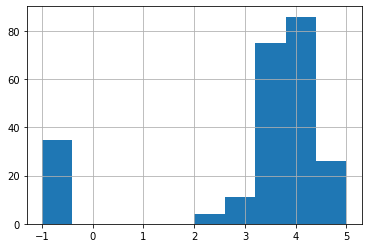

In [22]:
df.Rating.hist()

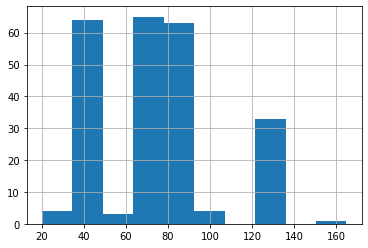

In [23]:
df.avg_salary.hist()

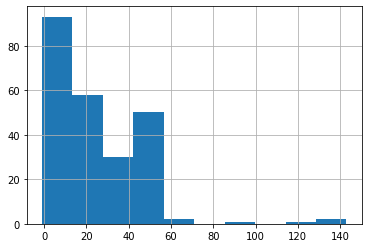

In [24]:
df.age.hist()

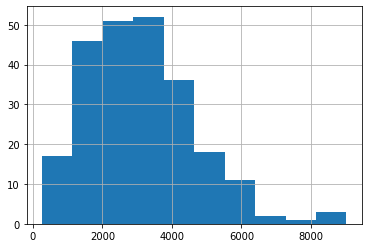

In [25]:
df.desc_len.hist()

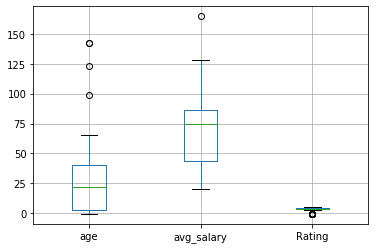

In [26]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

In [27]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

age  avg_salary    Rating  desc_len
age         1.000000    0.010420  0.331073  0.011588
avg_salary  0.010420    1.000000  0.210051 -0.019275
Rating      0.331073    0.210051  1.000000  0.117506
desc_len    0.011588   -0.019275  0.117506  1.000000

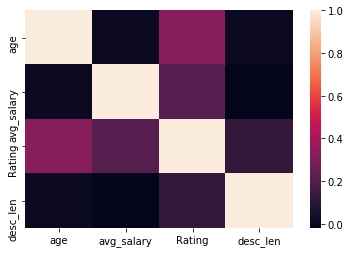

In [28]:
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr())

In [29]:
cat_feats = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_feats.append(col)
cat_feats

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Company Name',
 'Location',
 'Size',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'company_txt',
 'job_state',
 'job_simp',
 'seniority']

graph for Job Title; total = 214


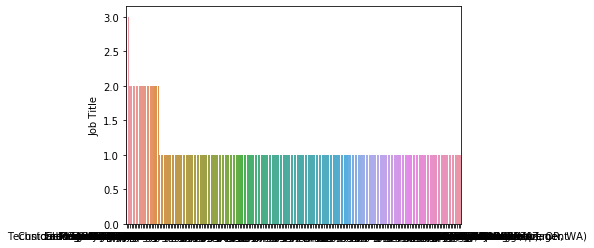

graph for Salary Estimate; total = 24


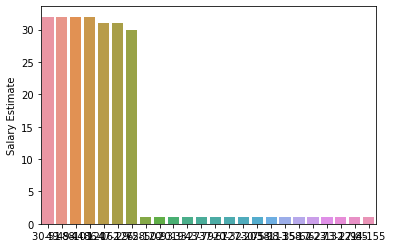

graph for Job Description; total = 223


/home/achraf/miniconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 61607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/achraf/miniconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 61607 missing from current font.
  font.set_text(s, 0, flags=flags)


graph for Company Name; total = 107


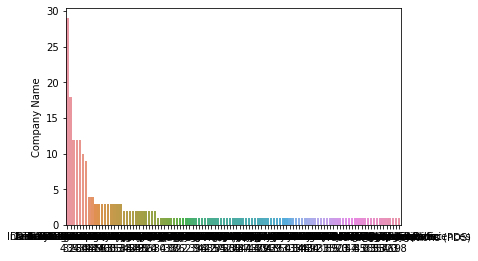

graph for Location; total = 129


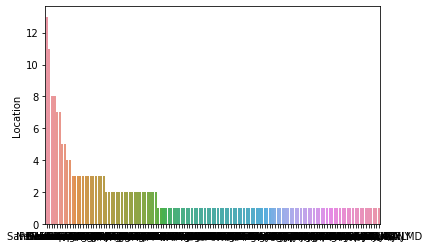

graph for Size; total = 9


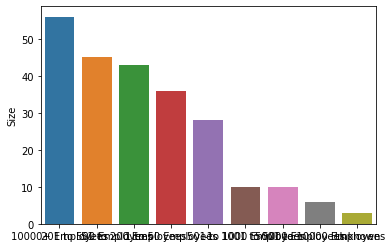

graph for Type of ownership; total = 9


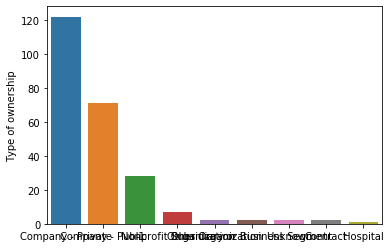

graph for Industry; total = 26


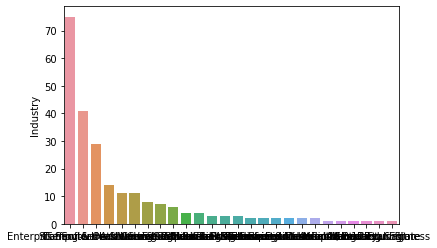

graph for Sector; total = 15


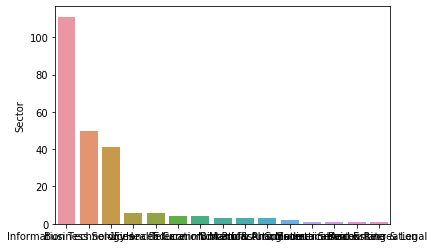

graph for Revenue; total = 14


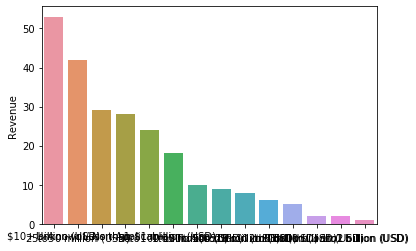

graph for company_txt; total = 106


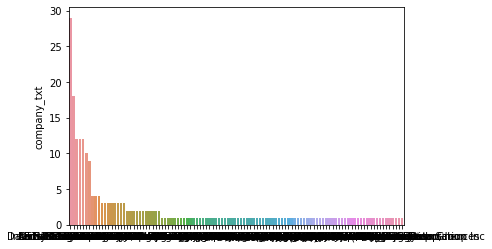

graph for job_state; total = 35


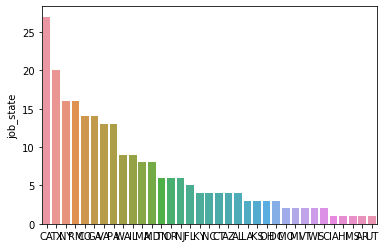

graph for job_simp; total = 7


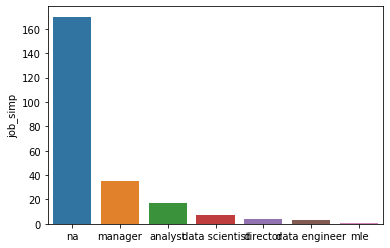

graph for seniority; total = 2


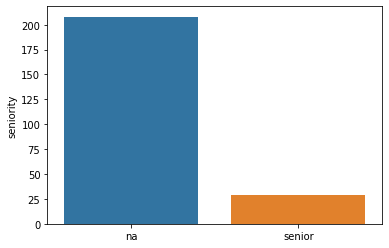

In [32]:
for col in cat_feats:
    cat_num = df[col].value_counts()
    print("graph for %s; total = %d" % (col, len(cat_num)))
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

graph for Location; total = 20


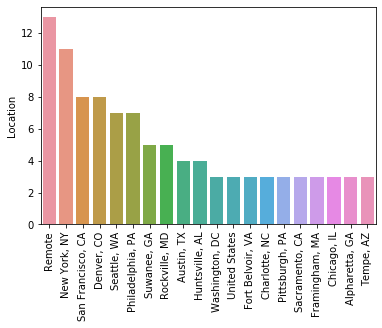

graph for company_txt; total = 20


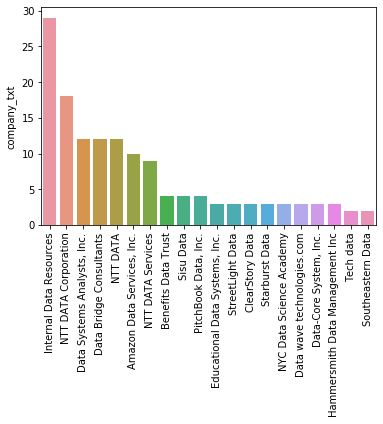

In [33]:
for col in df[cat_feats][['Location', 'company_txt']].columns:
    cat_num = df[col].value_counts()[:20]
    print("graph for %s; total = %d" % (col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [34]:
pd.pivot_table(df, index='job_simp', values='avg_salary')
# Rq: by def take average of columns in values parameter

avg_salary
job_simp                  
analyst          78.764706
data engineer    99.000000
data scientist  110.642857
director         79.500000
manager          72.057143
mle              68.500000
na               72.079412

In [35]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        na          82.500000
               senior      61.333333
data engineer  na          99.000000
data scientist na         112.900000
               senior     105.000000
director       na          64.666667
               senior     124.000000
manager        na          72.187500
               senior      70.666667
mle            na          68.500000
na             na          71.270000
               senior      78.150000

In [36]:
pd.pivot_table(df, index='job_state', values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

avg_salary
job_state            
CA                 27
TX                 20
RM                 16
NY                 16
GA                 14
CO                 14
VA                 13
PA                 13
WA                  9
IL                  9
MA                  8
MD                  8
OR                  6
NJ                  6
TN                  6
FL                  5
NC                  4
AL                  4
CT                  4
AZ                  4
KY                  4
LA                  3
KS                  3
DC                  3
OH                  3
SC                  2
VT                  2
MI                  2
MO                  2
WI                  2
MS                  1
UT                  1
AR                  1
IA                  1
HI                  1

In [37]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [38]:
for col in df_pivots.columns:
    print(pd.pivot_table(df_pivots, index=col, values="avg_salary").sort_values("avg_salary", ascending=False))

        avg_salary
Rating            
 3.4    103.500000
 2.7    103.000000
 4.3     93.384615
 2.5     87.500000
 4.2     87.266667
 3.0     84.250000
 3.1     82.000000
 5.0     80.318182
 3.5     77.901961
 4.7     76.666667
 4.0     75.235294
 3.2     74.375000
 3.6     72.250000
 3.3     70.500000
 3.9     69.583333
 4.9     68.312500
 3.7     65.500000
 4.4     63.000000
-1.0     60.457143
 2.8     59.250000
 4.1     54.166667
 3.8     53.000000
 2.9     43.500000
 4.5     42.000000
 2.3     40.500000
                                         avg_salary
Industry                                           
Real Estate                              124.000000
Publishing                               105.250000
Health, Beauty, & Fitness                 96.000000
Venture Capital & Private Equity          91.375000
Staffing & Outsourcing                    87.913793
Electrical & Electronic Manufacturing     84.250000
Telecommunications Manufacturing          83.750000
Consulting         

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()